🔹 Linear Regression R²: 0.877
🔹 Linear Regression RMSE: 6.09
🔹 Logistic Regression Accuracy: 100.0 %
🔹 Decision Tree Accuracy: 100.0 %
🔹 Confusion Matrix (Decision Tree):
 [[6 0 0]
 [0 7 0]
 [0 0 7]]


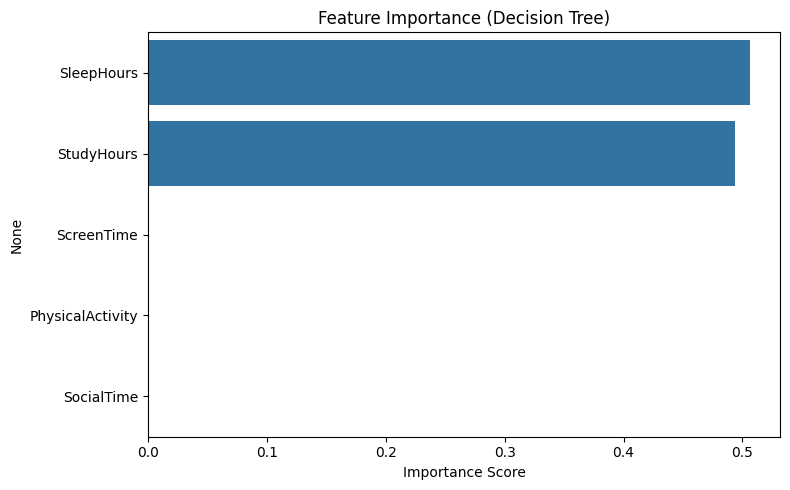

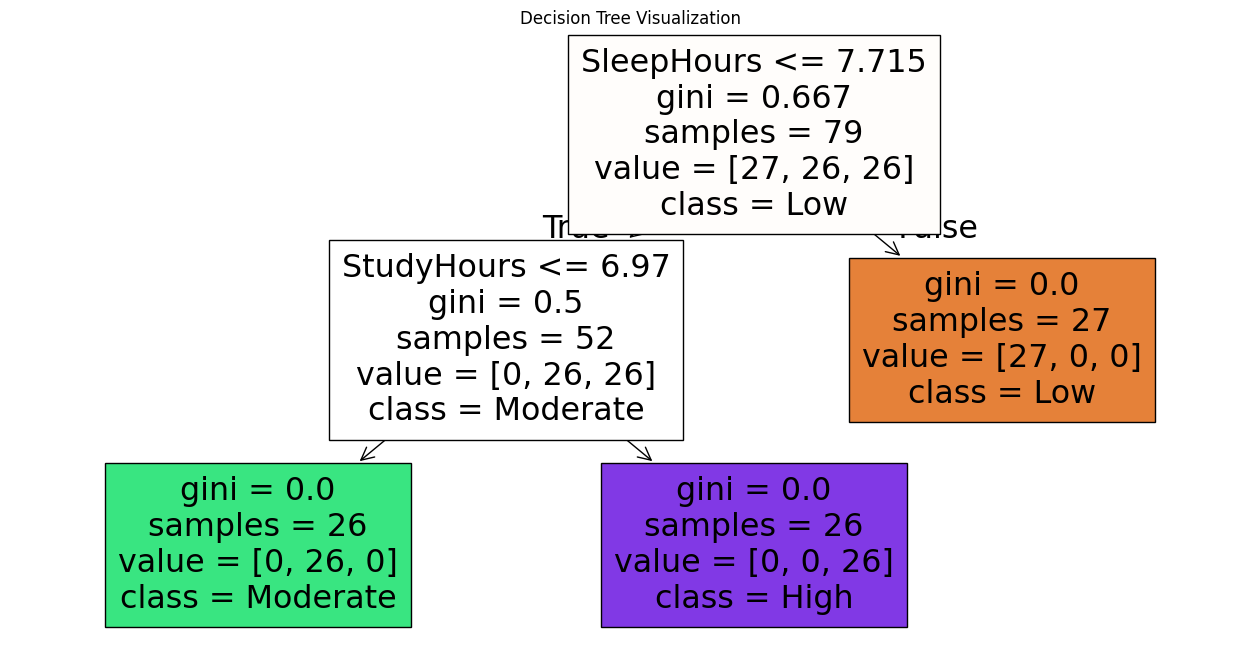


📊 Predicted Stress Score (0–100): 100.02
🧠 Predicted Stress Category: High


In [6]:
# Forecasting Academic Stress using Machine Learning

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create synthetic balanced dataset
data = []
for category, sleep_r, study_r, screen_r, phys_r, social_r in [
    ('Low', (8, 9), (2, 5), (0.5, 2), (1, 2), (2, 4)),
    ('Moderate', (6.5, 7.5), (5, 7), (2, 4), (0.5, 1.5), (1, 3)),
    ('High', (4.5, 6), (7, 10), (3, 6), (0, 0.5), (0, 1.5))
]:
    for _ in range(33):
        s = np.round(np.random.uniform(*sleep_r), 2)
        st = np.round(np.random.uniform(*study_r), 2)
        sc = np.round(np.random.uniform(*screen_r), 2)
        p = np.round(np.random.uniform(*phys_r), 2)
        so = np.round(np.random.uniform(*social_r), 2)
        stress = 100 - s*6 + st*5 + sc*4 - p*3 - so*2
        stress = np.clip(stress, 0, 100)
        data.append([s, st, sc, p, so, stress, category])

df = pd.DataFrame(data, columns=[
    'SleepHours', 'StudyHours', 'ScreenTime', 'PhysicalActivity',
    'SocialTime', 'StressScore', 'StressCategory'
])
df['StressLabel'] = df['StressCategory'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Step 2: Prepare data and split
X = df[['SleepHours', 'StudyHours', 'ScreenTime', 'PhysicalActivity', 'SocialTime']]
y_score = df['StressScore']
y_class = df['StressLabel']

X_train, X_test, y_score_train, y_score_test, y_class_train, y_class_test = train_test_split(
    X, y_score, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Step 3: Train models
linreg = LinearRegression().fit(X_train, y_score_train)
logreg = LogisticRegression(max_iter=1000).fit(X_train, y_class_train)
tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_class_train)

# Step 4: Predict and evaluate
y_pred_score = linreg.predict(X_test)
y_pred_class = logreg.predict(X_test)
y_pred_tree = tree.predict(X_test)

print("🔹 Linear Regression R²:", round(linreg.score(X_test, y_score_test), 3))
# Calculate RMSE without the 'squared' parameter, then take the square root
print("🔹 Linear Regression RMSE:", round(np.sqrt(mean_squared_error(y_score_test, y_pred_score)), 2))
print("🔹 Logistic Regression Accuracy:", round(accuracy_score(y_class_test, y_pred_class)*100, 2), "%")
print("🔹 Decision Tree Accuracy:", round(accuracy_score(y_class_test, y_pred_tree)*100, 2), "%")
print("🔹 Confusion Matrix (Decision Tree):\n", confusion_matrix(y_class_test, y_pred_tree))

# Step 5: Visualize feature importance
importance = pd.Series(tree.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 5))
sns.barplot(x=importance.values, y=importance.index)
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Step 6: Visualize decision tree
plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=X.columns, class_names=['Low', 'Moderate', 'High'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Step 7: Manual Input Prediction (change these values as needed)
input_data = {
    'SleepHours': 6.0,         # e.g. 6 hours sleep
    'StudyHours': 8.5,         # e.g. 8.5 hours study
    'ScreenTime': 4.0,         # e.g. 4 hours screen
    'PhysicalActivity': 0.5,   # e.g. 0.5 hours exercise
    'SocialTime': 1.0          # e.g. 1 hour social time
}
user_df = pd.DataFrame([input_data])

# Predict stress score and category
predicted_score = linreg.predict(user_df)[0]
predicted_category = tree.predict(user_df)[0]
category_map = {0: 'Low', 1: 'Moderate', 2: 'High'}

# Show prediction result
print("\n📊 Predicted Stress Score (0–100):", round(predicted_score, 2))
print("🧠 Predicted Stress Category:", category_map[predicted_category])
